# Venn diagram comparing female and male SZ differential expression results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
plt.rcParams.update({'font.size': 22, 'font.weight': 'bold'})

In [3]:
def get_deg_df(tissue, feature):
    fn1 = "../../../%s/female_analysis/_m/%s/diffExpr_szVctl_full.txt" % (tissue.lower(), feature)
    fn2 = "../../../%s/male_analysis/_m/%s/diffExpr_szVctl_full.txt" % (tissue.lower(), feature)
    female = pd.read_csv(fn1, sep='\t', index_col=0)
    male = pd.read_csv(fn2, sep='\t', index_col=0)
    return female[(female['adj.P.Val'] <= 0.05)], male[(male['adj.P.Val'] <= 0.05)]


def plot_venn(tissue, feature):
    ff, mm = get_deg_df(tissue, feature)
    plt.figure(figsize=(10,10))
    v = venn2([set(ff.index), set(mm.index)], set_labels = ('Female', 'Male'))
    v.get_patch_by_id('10').set_color('red')
    v.get_patch_by_id('10').set_alpha(0.75)
    v.get_patch_by_id('01').set_color('blue')
    v.get_patch_by_id('01').set_alpha(0.75)
    try:
        v.get_patch_by_id('11').set_color('purple')
        v.get_patch_by_id('11').set_alpha(0.75)
    except AttributeError:
        print("There is no overlap!")
    plt.savefig('venn_%s_%s.png' % (tissue.lower(), feature))
    plt.savefig('venn_%s_%s.pdf' % (tissue.lower(), feature))

There is no overlap!
There is no overlap!
There is no overlap!
There is no overlap!
There is no overlap!
There is no overlap!
There is no overlap!
There is no overlap!


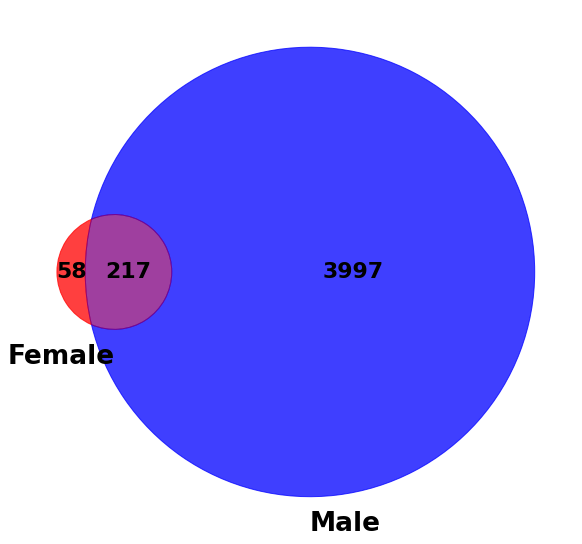

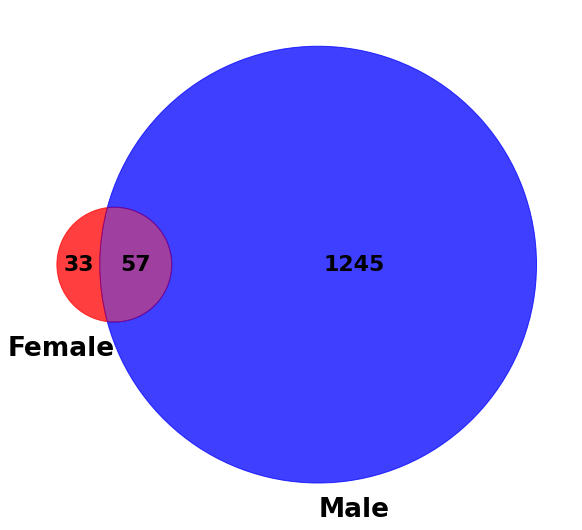

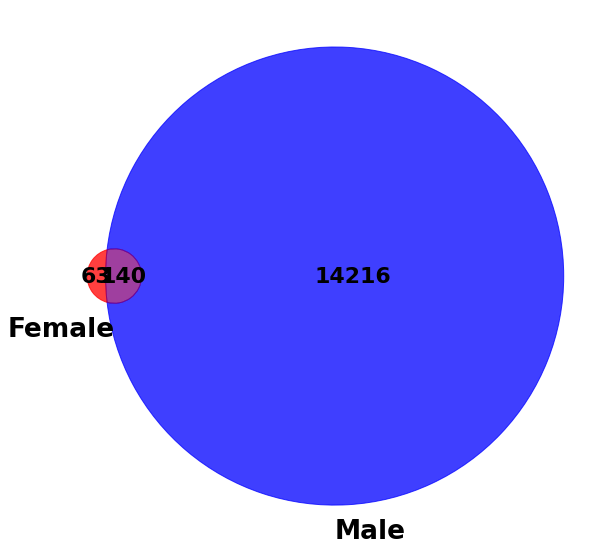

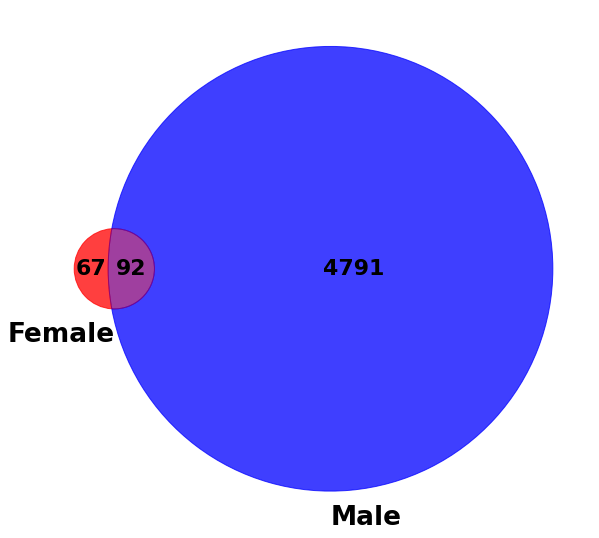

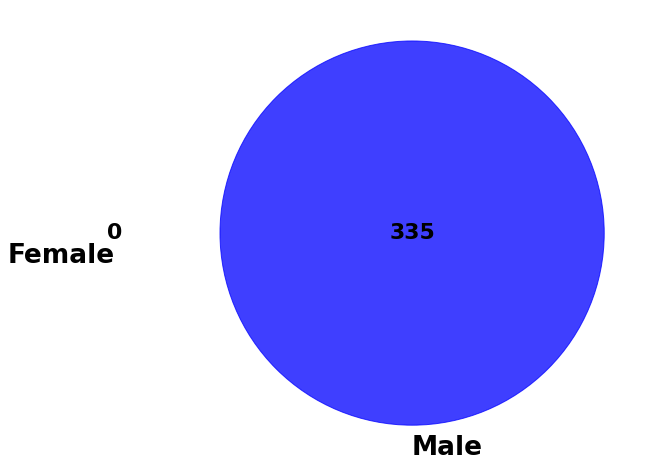

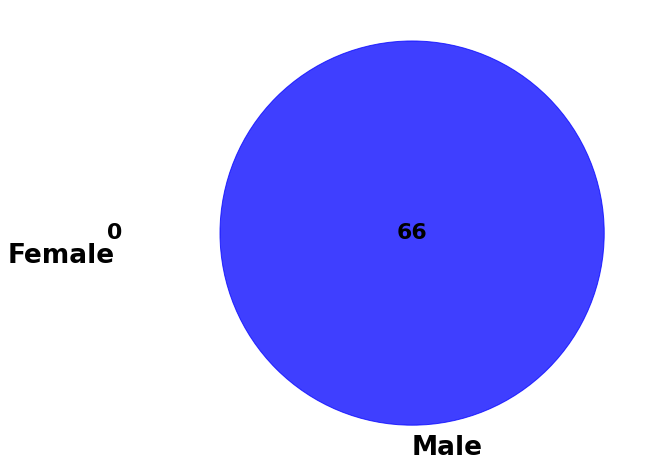

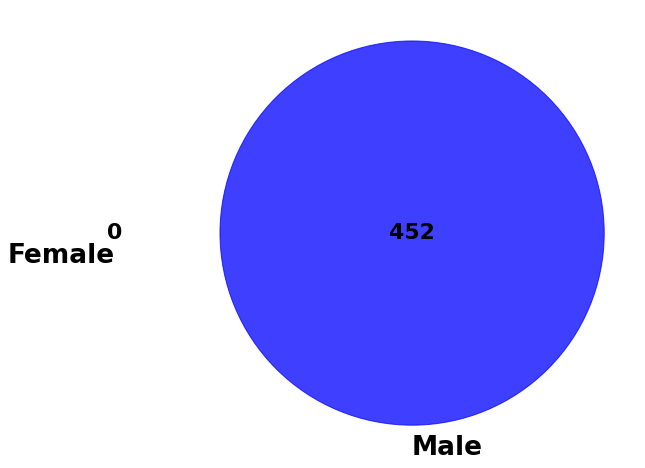

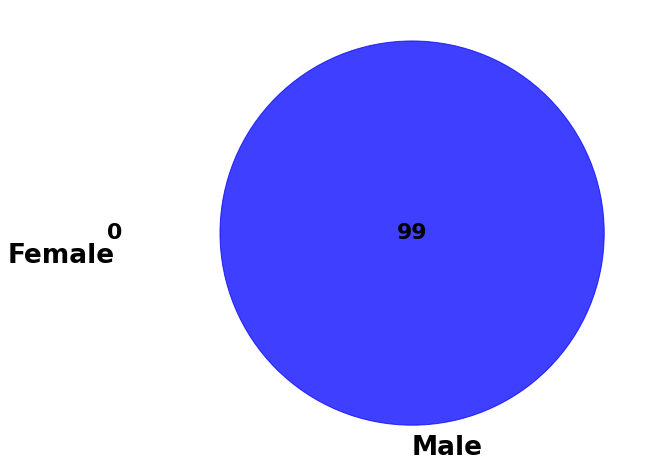

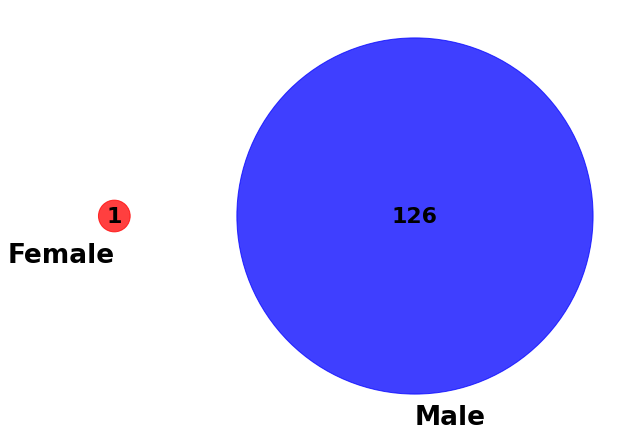

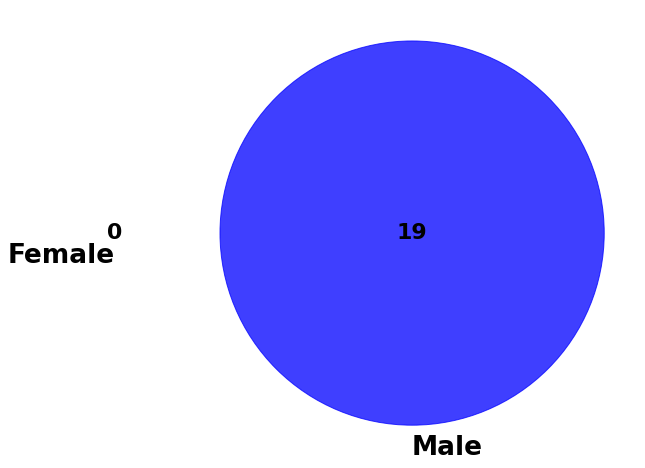

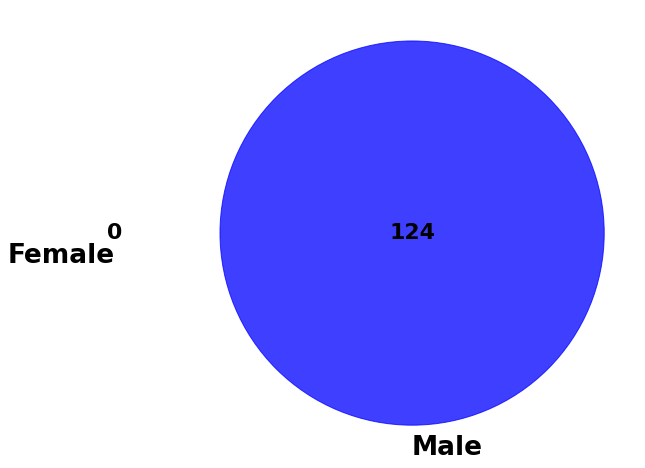

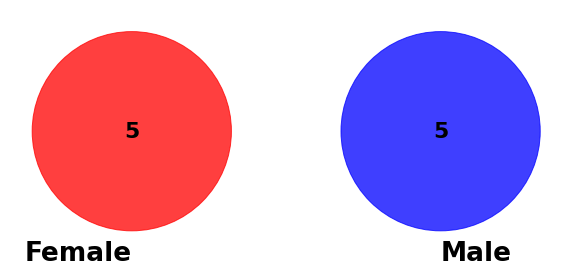

In [4]:
for tissue in ['Caudate', 'DLPFC', 'Hippocampus']:
    for feature in ['genes', 'transcripts', 'exons', 'junctions']:
        plot_venn(tissue, feature)

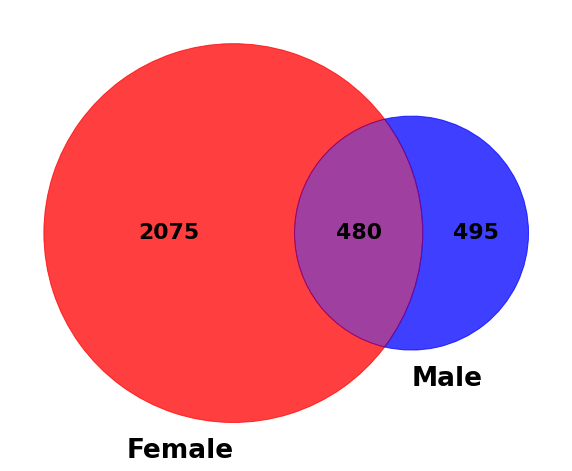

In [5]:
plot_venn('cmc_dlpfc', 'genes')